In [ ]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing

# Метрические методы

## K-NN

### Подготовка данных

In [ ]:
# Выгружаем датасет
dataset = datasets.load_iris()

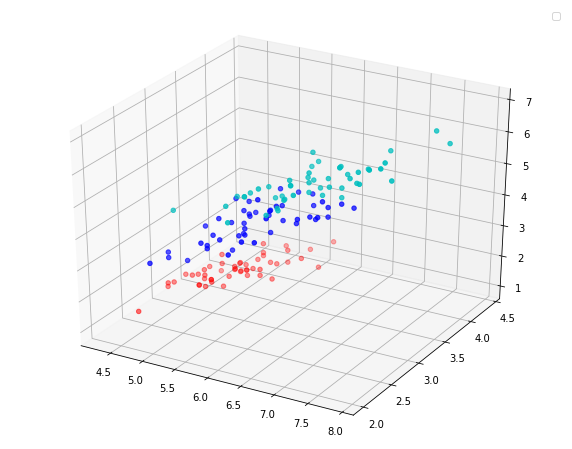

In [ ]:
# Задаём цвета для точек
colors = {0: "r",
          1: "b",
          2: "c",
          3: "k"}

# Создаём график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Так как мы не можем отобразить 4-х мерное пространство, отобразим в 3-х мерном
# Учтём то, что существует разные комбинации признаков
ax.scatter(dataset["data"][:, 0], dataset["data"][:, 1], dataset["data"][:, 2], c=[colors[label] for label in dataset["target"]])
ax.legend();

In [ ]:
standartizator = StandardScaler()
normalizer_1 = MinMaxScaler(feature_range=(0, 1))
normalizer_2 = MinMaxScaler(feature_range=(-1, 1))

X_standarted = standartizator.fit_transform(dataset["data"])
X_normalised_1 = normalizer_1.fit_transform(dataset["data"])
X_normalised_2 = normalizer_2.fit_transform(dataset["data"])

Как вы можете видеть на графике, все признаки стали стандартизированный. Другими словами говоря признаки изменились в масштабе.

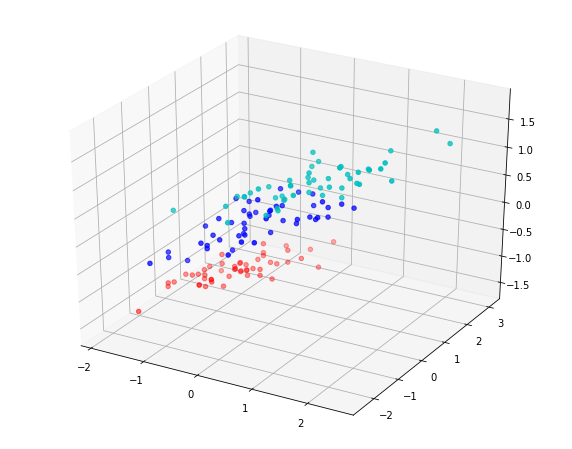

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_standarted[:, 0], X_standarted[:, 1], X_standarted[:, 2], label='parametric curve', c=[colors[label] for label in dataset["target"]]);

Вот как выглядят признаки нормализованные в пределах 0 и 1

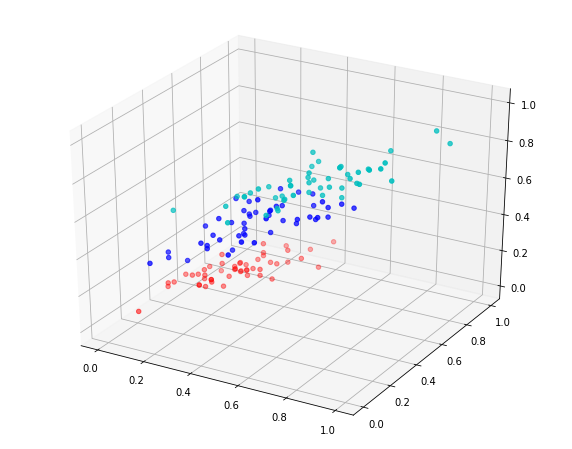

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_normalised_1[:, 0], X_normalised_1[:, 1], X_normalised_1[:, 2], label='parametric curve', c=[colors[label] for label in dataset["target"]]);

Признаки нормализованные в пределах от -1 до 1

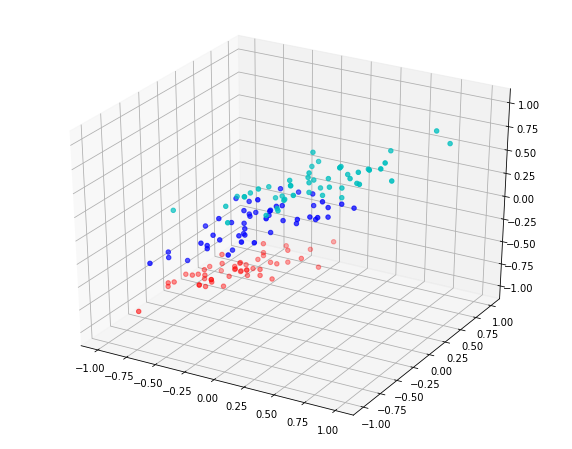

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_normalised_2[:, 0], X_normalised_2[:, 1], X_normalised_2[:, 2], label='parametric curve', c=[colors[label] for label in dataset["target"]]);

Теперь стоит пояснить для чего же нам нужно стандартизировать или нормализовать признаки. Представим такие признаки: [длина машины, ширина машины, пробег]. Признаки связаные с габаритами будут в метрах, а пробег будет в километрах. Ну и теперь сами подумайте, что произойдёт в этом случае. Произойдет то, что признаки связанные с габаритами никак не будут влиять на классификатор, так как пробег будет более приоритетным.

И да, в нашем датасете такой проблемы нет, но нормализация всё равно нужна.

### Введение в sklearn

В sklearn существует 2 типа объектов estimator (оценщик) и transformer (обработчик данных). В данном случае KNeighbors - estimator, а MinMaxScaler - transformer.

Оценщики содержат функции для обучения и выдачи предсказаний. Трансформеры содержат функции для обучения (обучение нужно например для того что бы вычислить среднее по обучающей выборки) и преобразования данных.

### Разделение датасета

#### Dataset split

Чем же машинное обучение отличается от простой задачи апроксимации функции? Тем, что мы должны не только приблизить функцию к минимуму (уменьшить ошибку на тренировочных данных), но и уменьшить ошибку на тестовом наборе. Для этого мы разделим наш обучающий набор на 2 поднабора. 1 поднабор мы назовём обучающие данные, 2 поднабор мы назовём проверочным (на нём мы будем смотреть ошибку каждую эпоху обучения, и модель его не видит).

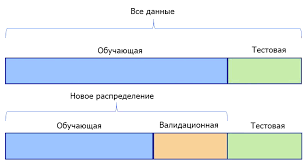

#### Cross-validation

С помощью кросс-валидации эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы. 

Обучающая выборка разбивается на k непересекающихся одинаковых по объему частей и производится k итераций. На каждой итерации происходит следующее:

Модель обучается на k−1 части обучающей выборки;

Модель тестируется на части обучающей выборки, которая не участвовала в обучении.

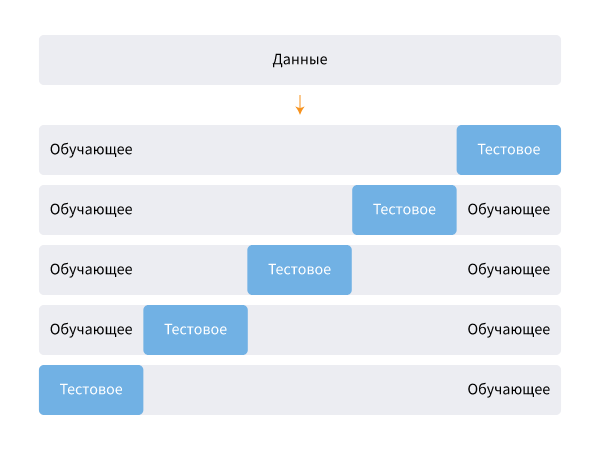

### Обучение алгоритма KNN

Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:

* число соседей `n_neighbors`
* метрика расстояния между объектами `metric`
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос") `weights`

Для описание всех данных и ответов используем X и y соответсвенно.

In [ ]:
X = X_standarted
y = dataset["target"]

Матрица признаков

In [ ]:
X.shape

(150, 4)

Вектор ответов

In [ ]:
y.shape

(150,)

Пример разделения датасета

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
X_test.shape

(45, 4)

Обучение модели при помощи кросс валидации

In [ ]:
# cv - количество частей на которые разделяется датасет
# n_jobs - количество потоков для паралельного обучения
clf = cross_validate(KNeighborsClassifier(),
                     X_standarted,
                     y,
                     cv=3,
                     n_jobs=-1)
clf

{'fit_time': array([0.00099254, 0.0021174 , 0.0007956 ]),
 'score_time': array([0.00657248, 0.00440669, 0.00212312]),
 'test_score': array([0.98, 0.96, 0.94])}

Настоятельно рекомендую обучать модели при помощи кросс валидации если нет тестового набора данных. 

Теперь у нас есть 3 оценки которые можно устреднить и получить одну.

### Поиск гиперпараметров

Мало выбрать модель и обучить её, надо еще выбрать оптимальные гиперпараметры. В нешем случае метрику модели можно улучшить.

GridSearch - строит таблицу гиперпарамтеров и для каждой ячейчки таблицы вычисляет метрику.

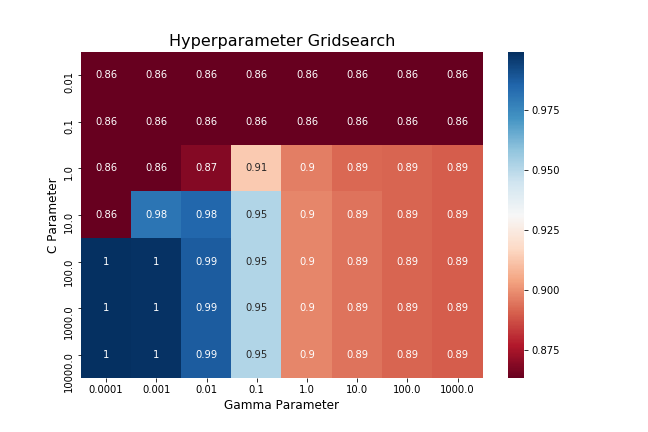

Обучим контейнер машинного обучения.

In [ ]:
ppl_KNN = Pipeline([("scaler", StandardScaler()),
                    ("model", KNeighborsClassifier())])

# Когда обучаем конейнер через грид, в param_grid нужно указать: имякомпонента__егогиперпараметр
CV_model = GridSearchCV(ppl_KNN,
                        param_grid={"model__weights" : ["uniform", "distance"],
                                    "model__p" :  [1, 2],
                                    "model__n_neighbors" : [5, 10, 15, 30, 50]},
                        cv=5,
                        n_jobs=-1)
# В данном случае отдаём нескалированные данные т.к контейнер все отскалирует
CV_model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [5, 10, 15, 30, 50],
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']})

In [ ]:
print("Лучшие параметры: ", CV_model.best_params_)
print("Лучшая метрика: ", CV_model.best_score_)

Лучшие параметры:  {'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'distance'}
Лучшая метрика:  0.9666666666666666


Почему такой подход лучше всего? Все из-за того что после анализ и  препроцессинга данных у вас есть X и y. А для каждого алгоритма нужно проделывать свои дополнительные предобработки.